In [12]:
!pip install mne PyWavelets

In [25]:
import tensorflow as tf
import numpy as np
import h5py

class Config:
  # the configuration class variables changes according to your needs and 
  # according to the environment 
    wavelet = {'name': 'db4', 'level': 4}
    epochs=500
    N_train=16651
    N_val=1474
    batch_size=256
    dropout = 0.45
    path_to_data = "data/"
    n_channel=18



def load_dataset_hdf5(split,secs=15,s_rate=256):
  
  def _generate_xy():
        with h5py.File(set_handle, 'r') as hf:
            for i,(x,y) in enumerate(zip(hf["X"],hf['y'])) :
               yield x,y

  set_handle = Config.path_to_data+"{}.hdf5".format(split)
  return tf.data.Dataset.from_generator(  _generate_xy , 
                                              output_signature=( tf.TensorSpec(shape=(secs*s_rate,18), dtype=tf.double) , 
                                                                tf.TensorSpec(shape=(), dtype=tf.float32),)) 

In [26]:
ds=load_dataset_hdf5("train",secs=15 )

X=[]
Y=[]
for x,y in ds.as_numpy_iterator():
  X.append(x)
  Y.append(y)

Creating RawArray with float64 data, n_channels=18, n_times=3840
    Range : 0 ... 3839 =      0.000 ...    14.996 secs
Ready.


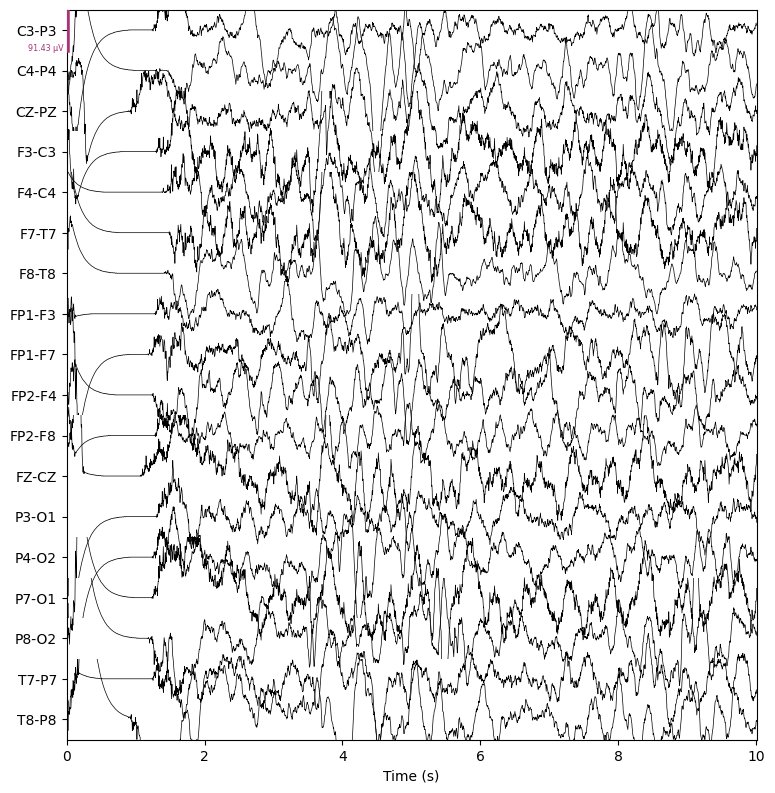

In [30]:
freq=256
import mne
plot_kwargs = {
    'scalings': "auto",
    "duration": 10.,       
    'show_scrollbars': False,
    'show': True,
    "remove_dc":False,


}
 
channels_keep=['C3-P3',
 'C4-P4',
 'CZ-PZ',
 'F3-C3',
 'F4-C4',
 'F7-T7',
 'F8-T8',
 'FP1-F3',
 'FP1-F7',
 'FP2-F4',
 'FP2-F8',
 'FZ-CZ',
 'P3-O1',
 'P4-O2',
 'P7-O1',
 'P8-O2',
 'T7-P7',
 'T8-P8']

def mne_object(data,channels=channels_keep ,freq=256):
  # create an mne info file with meta data about the EEG
  info = mne.create_info(ch_names=channels, 
                         sfreq=freq, 
                         ch_types=['eeg']*len(channels) )
  
  # data needs to be in volts rather than in microvolts
  data = data.T*1e-6
  # transpose the data
  
  # create raw mne object
  raw = mne.io.RawArray(data, info)
  
 
  return raw
 
mne_data = mne_object(X[10])
_=mne_data.plot( **plot_kwargs,verbose=False )

In [29]:
len(X)

15794